In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Define the path to the CSV file in your Google Drive
csv_file_path = '/content/drive/My Drive/Urban_planning_with_LUCGAN/data/HousePriceData.csv'

# Load the data into a DataFrame
df = pd.read_csv(csv_file_path)

# Check the data
print(df.head())


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [5]:
import pandas as pd
import networkx as nx

# Load the CSV file into a DataFrame
csv_file_path = '/content/drive/MyDrive/Urban_planning_with_LUCGAN/data/HousePriceData.csv'  # Replace with the actual path
df = pd.read_csv(csv_file_path)

# Create an empty graph
G = nx.Graph()

# Select the first 10 rows from the DataFrame
for index, row in df.head(100).iterrows():  # Process only the first 10 rows
    house_id = row['Address']
    latitude = row['Lattitude']
    longitude = row['Longtitude']
    price = row['Price']

    # Add a node for each house
    G.add_node(house_id, latitude=latitude, longitude=longitude, price=price)

    # Connect houses based on proximity (e.g., within a certain distance)
    for neighbor_index, neighbor in df.head(100).iterrows():  # Process only the first 10 rows for neighbors
        neighbor_id = neighbor['Address']
        neighbor_latitude = neighbor['Lattitude']
        neighbor_longitude = neighbor['Longtitude']

        # Calculate Euclidean distance (you can use a different metric)
        distance = ((latitude - neighbor_latitude) ** 2 + (longitude - neighbor_longitude) ** 2) ** 0.5

        # Add an edge if houses are within a certain distance (adjust threshold as needed)
        if distance < 0.1:  # Adjust this threshold as needed
            G.add_edge(house_id, neighbor_id, distance=distance)

# Now, your graph G contains nodes representing houses and edges representing proximity, based on the first 10 rows of the CSV data.


In [8]:
import torch
import torch.nn as nn
import dgl
from dgl.data import DGLDataset
from dgl import DGLGraph


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


ValueError: ignored

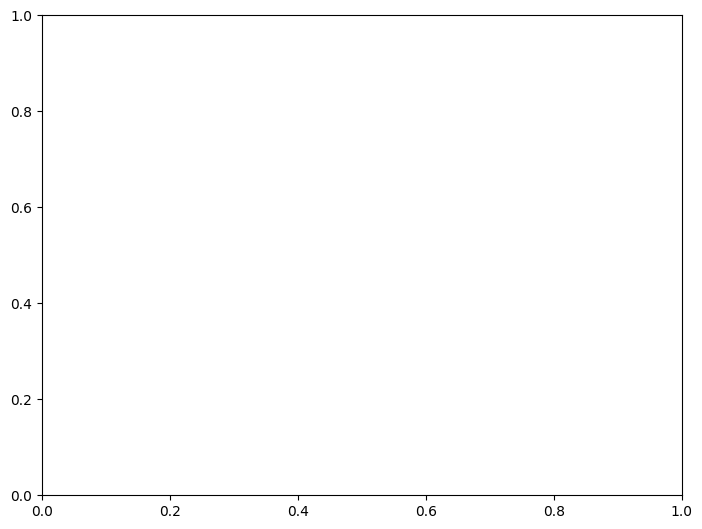

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
csv_file_path = '/content/drive/MyDrive/Urban_planning_with_LUCGAN/data/HousePriceData.csv'  # Replace with the actual path
df = pd.read_csv(csv_file_path)

# Create an empty graph
G = nx.Graph()

# Create a color map for nodes
color_map = []

# Select the first 10 rows from the DataFrame
for index, row in df.head(100).iterrows():  # Process only the first 10 rows
    house_id = row['Address']
    latitude = row['Lattitude']
    longitude = row['Longtitude']
    price = row['Price']

    # Add a node for each house
    G.add_node(house_id, latitude=latitude, longitude=longitude, price=price)

    # Append a unique color for each node based on its attributes
    color_map.append(price)  # Assuming 'price' is a numeric value that determines the color

    # Connect houses based on proximity (e.g., within a certain distance)
    for neighbor_index, neighbor in df.head(100).iterrows():  # Process only the first 10 rows for neighbors
        neighbor_id = neighbor['Address']
        neighbor_latitude = neighbor['Lattitude']
        neighbor_longitude = neighbor['Longtitude']

        # Calculate Euclidean distance (you can use a different metric)
        distance = ((latitude - neighbor_latitude) ** 2 + (longitude - neighbor_longitude) ** 2) ** 0.5

        # Add an edge if houses are within a certain distance (adjust threshold as needed)
        if distance < 0.1:  # Adjust this threshold as needed
            G.add_edge(house_id, neighbor_id, distance=distance)

# Now, your graph G contains nodes representing houses and edges representing proximity, based on the first 10 rows of the CSV data.

# Visualize the graph with nodes in different colors
pos = nx.spring_layout(G)  # Layout algorithm (you can choose a different layout)
nx.draw(G, pos, node_color=color_map, cmap=plt.get_cmap('viridis'), node_size=50, with_labels=True)
plt.show()


<ipython-input-11-c6be387733df>:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Price')


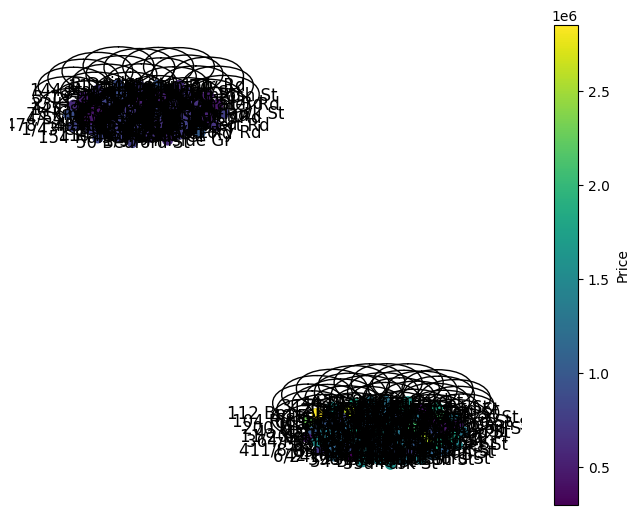

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
csv_file_path = '/content/drive/MyDrive/Urban_planning_with_LUCGAN/data/HousePriceData.csv'  # Replace with the actual path
df = pd.read_csv(csv_file_path)

# Create an empty graph
G = nx.Graph()

# Select the first 10 rows from the DataFrame
for index, row in df.head(100).iterrows():  # Process only the first 10 rows
    house_id = row['Address']
    latitude = row['Lattitude']
    longitude = row['Longtitude']
    price = row['Price']

    # Add a node for each house
    G.add_node(house_id, latitude=latitude, longitude=longitude, price=price)

    # Connect houses based on proximity (e.g., within a certain distance)
    for neighbor_index, neighbor in df.head(100).iterrows():  # Process only the first 10 rows for neighbors
        neighbor_id = neighbor['Address']
        neighbor_latitude = neighbor['Lattitude']
        neighbor_longitude = neighbor['Longtitude']

        # Calculate Euclidean distance (you can use a different metric)
        distance = ((latitude - neighbor_latitude) ** 2 + (longitude - neighbor_longitude) ** 2) ** 0.5

        # Add an edge if houses are within a certain distance (adjust threshold as needed)
        if distance < 0.1:  # Adjust this threshold as needed
            G.add_edge(house_id, neighbor_id, distance=distance)

# Now, your graph G contains nodes representing houses and edges representing proximity, based on the first 10 rows of the CSV data.

# Visualize the graph with nodes in different colors using the 'viridis' colormap
pos = nx.spring_layout(G)  # Layout algorithm (you can choose a different layout)

# Get the 'price' attribute as a list for color mapping
node_colors = [G.nodes[node]['price'] for node in G.nodes]

# Create a colormap based on the 'price' values
cmap = plt.get_cmap('viridis')

# Normalize the 'price' values for proper color mapping
vmin = min(node_colors)
vmax = max(node_colors)
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Create a scalar mappable for color mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Draw the graph with nodes in different colors
nx.draw(G, pos, node_color=node_colors, cmap=cmap, node_size=50, with_labels=True)

# Add a colorbar to the plot
plt.colorbar(sm, label='Price')

plt.show()



In [7]:
!pip install dgl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 13.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the CSV file in Google Drive
csv_file_path = '/content/drive/MyDrive/Urban_planning_with_LUCGAN/data/HousePriceData.csv'  # Replace 'your_file.csv' with the actual filename

# Load the CSV file into a DataFrame
try:
    df = pd.read_csv(csv_file_path)

    # Display the column names
    column_names = df.columns
    print(column_names)
except FileNotFoundError:
    print(f"File not found at path: {csv_file_path}")


Mounted at /content/drive
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [4]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the CSV file in Google Drive
csv_file_path = '/content/drive/MyDrive/Urban_planning_with_LUCGAN/data/HousePriceData.csv'  # Replace 'your_file.csv' with the actual filename

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the column names
column_names = df.columns
print(column_names)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
